# **Machine learning Experiment-9**
## **k-means clustering**


Dhruv Kangavkar- 1032221800

Batch-G1

ECE-AIML B


# **Post-lab questions:**
1. State applications of k-means clustering algorithm.

   K-means clustering is widely used across various fields due to its simplicity and efficiency.
*   Customer Segmentation: Businesses use k-means to group customers based on purchasing behavior, enabling targeted marketing strategies.

* Image Compression: K-means clusters similar pixel colors, reducing the number of colors in an image and resulting in smaller file sizes.

* Document Clustering: It organizes and groups similar documents or articles, facilitating information retrieval and management.

* Anomaly Detection: K-means helps identify outliers in datasets, which is valuable for fraud detection and cybersecurity.

* Recommendation Systems: By clustering similar items or users, k-means improves personalized recommendations in various applications.

* Genomics: In bioinformatics, k-means can cluster gene expression data, aiding in the identification of gene functions or disease subtypes.

* Urban Planning: K-means helps analyze geographical data, clustering regions based on various factors like demographics or land use.

* Sports Analytics: Teams use k-means to group players based on performance metrics, assisting in strategy formulation and player development.

# **Conclusion:**
In this experiment, we applied the K-Means clustering algorithm to the obesity dataset to uncover hidden patterns by grouping similar data points into clusters. The key steps involved data preprocessing, including label encoding for categorical variables and feature standardization to ensure that the clustering algorithm performed effectively.

We explored the dataset with an assumption of 3 clusters (k=3), and the model successfully assigned each data point to a cluster based on its proximity to the cluster centroids using Euclidean distance. The clusters provided insight into how individuals could be grouped based on their physical, behavioral, and dietary attributes.

We also used the elbow method to determine the optimal number of clusters. The elbow plot helped visualize the within-cluster sum of squares (WCSS) for different values of k, and the "elbow point" suggested the most appropriate value for k, ensuring that the model did not overfit or underfit the data.







In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import io
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

# Print the keys in the uploaded dictionary
print("Keys in uploaded:", uploaded.keys())

Saving McGill Bank.csv to McGill Bank.csv
Keys in uploaded: dict_keys(['McGill Bank.csv'])


In [12]:
df = pd.read_csv(io.BytesIO(uploaded['McGill Bank.csv']))
print("Head of the dataset:\n", df.head())

NameError: name 'io' is not defined

In [13]:
# Handle categorical features by encoding them (for k-means, we need numerical data)
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Drop any missing data or handle NA values (if any)
df = df.dropna()

# 3. Standardize the features (since K-Means is distance-based, it's essential to scale features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [14]:
# 4. Apply K-Means Clustering

# Decide the number of clusters (k), for example let's assume k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model
kmeans.fit(scaled_features)

# 5. Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

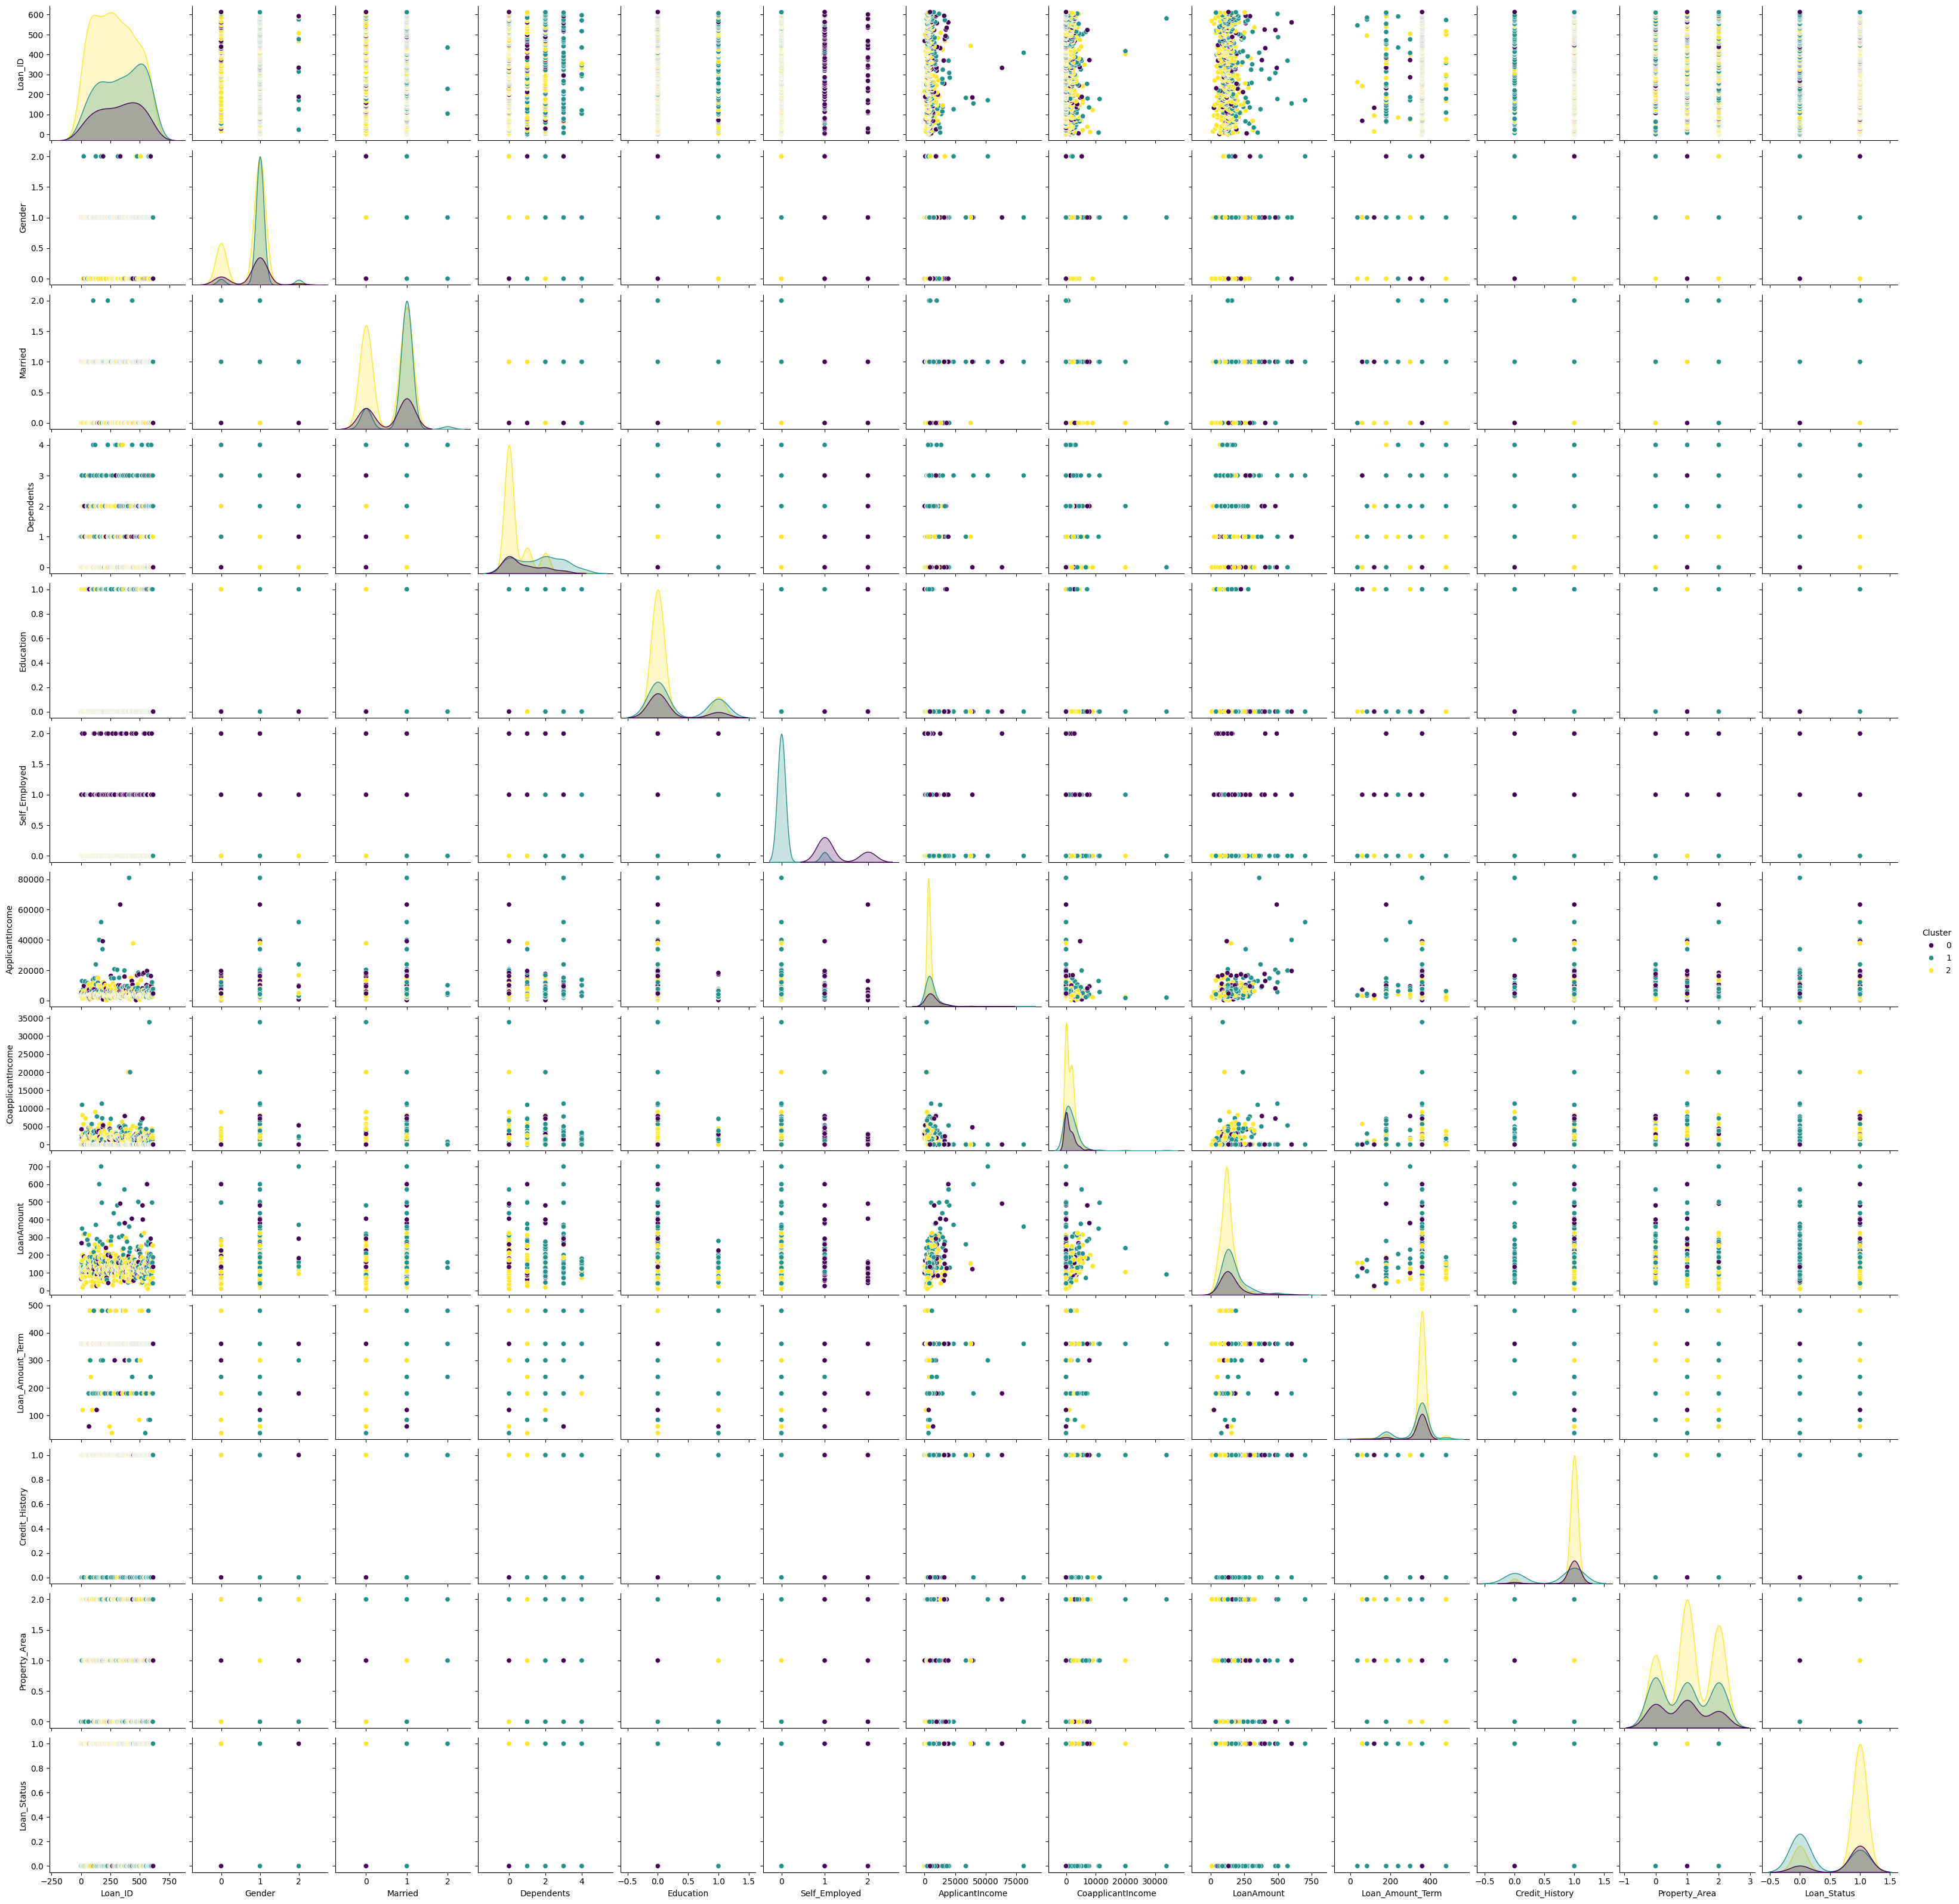

Calculating K-Means for k = 1 to 10: 100%|██████████| 10/10 [00:00<00:00, 128.61it/s]


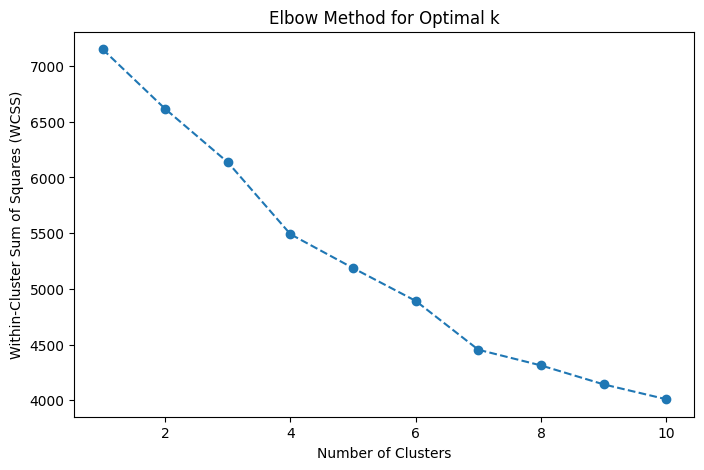

In [16]:
# Visualize the clustering result using a pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

# Plot the elbow method to determine the best k
from tqdm import tqdm  # For progress bar

wcss = []
k_range = range(1, 11)

# Use tqdm for progress bar
for i in tqdm(k_range, desc="Calculating K-Means for k = 1 to 10"):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Centroids: [[19.45454545]
 [47.88888889]]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


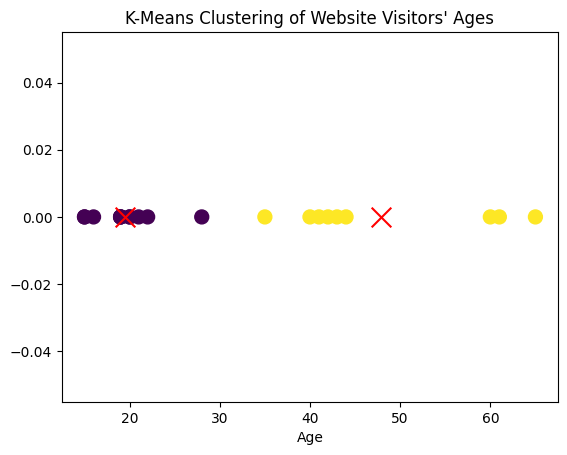

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load data
ages = np.array([19, 15, 15, 16, 19, 19, 20, 20, 21, 22, 28, 35, 40, 41, 42, 43, 44, 60, 61, 65]).reshape(-1, 1)

# Step 2: Define number of clusters (k) and initialize KMeans
k = 2
kmeans = KMeans(n_clusters=k, init=np.array([[16], [22]]), n_init=1)

# Step 3: Fit KMeans
kmeans.fit(ages)

# Step 4: Output centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:", centroids)
print("Cluster Labels:", labels)

# Step 5: Plot the data and clusters
plt.scatter(ages, np.zeros_like(ages), c=labels, cmap='viridis', s=100)
plt.scatter(centroids, np.zeros_like(centroids), c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering of Website Visitors' Ages")
plt.xlabel('Age')
plt.show()


# Interpreting this output:
* The KMeans algorithm has successfully clustered the data points (website visitors' ages) into two distinct groups, represented by the labels 0 and 1. The centroids, which are the average values of each cluster, are [19.45454545] and [47.88888889].
* Two Clusters: The data has been divided into two main clusters. One cluster likely represents younger visitors with ages around 19, while the other cluster represents older visitors with ages around 48.
* Cluster Labels: Each data point (age) has been assigned a label (0 or 1), indicating which cluster it belongs to. In this case, the first six visitors (with ages 19, 15, 15, 16, 19, and 19) are assigned to cluster 0 (younger visitors), while the remaining visitors are assigned to cluster 1 (older visitors).

Centroids: [[19.45454545]
 [47.88888889]]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


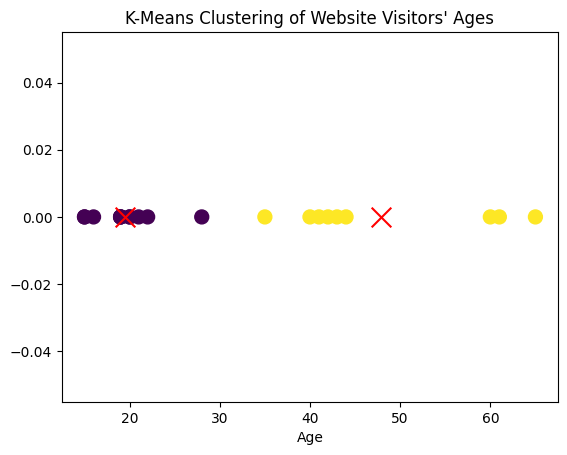

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load data
ages = np.array([19, 15, 15, 16, 19, 19, 20, 20, 21, 22, 28, 35, 40, 41, 42, 43, 44, 60, 61, 65]).reshape(-1, 1)

# Step 2: Define number of clusters (k) and initialize KMeans
k = 2
kmeans = KMeans(n_clusters=k, init=np.array([[16], [22]]), n_init=1)

# Step 3: Fit KMeans
kmeans.fit(ages)

# Step 4: Output centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:", centroids)
print("Cluster Labels:", labels)

# Step 5: Plot the data and clusters
plt.scatter(ages, np.zeros_like(ages), c=labels, cmap='viridis', s=100)
plt.scatter(centroids, np.zeros_like(centroids), c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering of Website Visitors' Ages")
plt.xlabel('Age')
plt.show()
